In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np

rc('xtick', labelsize = 20) 
rc('ytick', labelsize = 20) 
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

plt.rcParams['figure.dpi']= 300

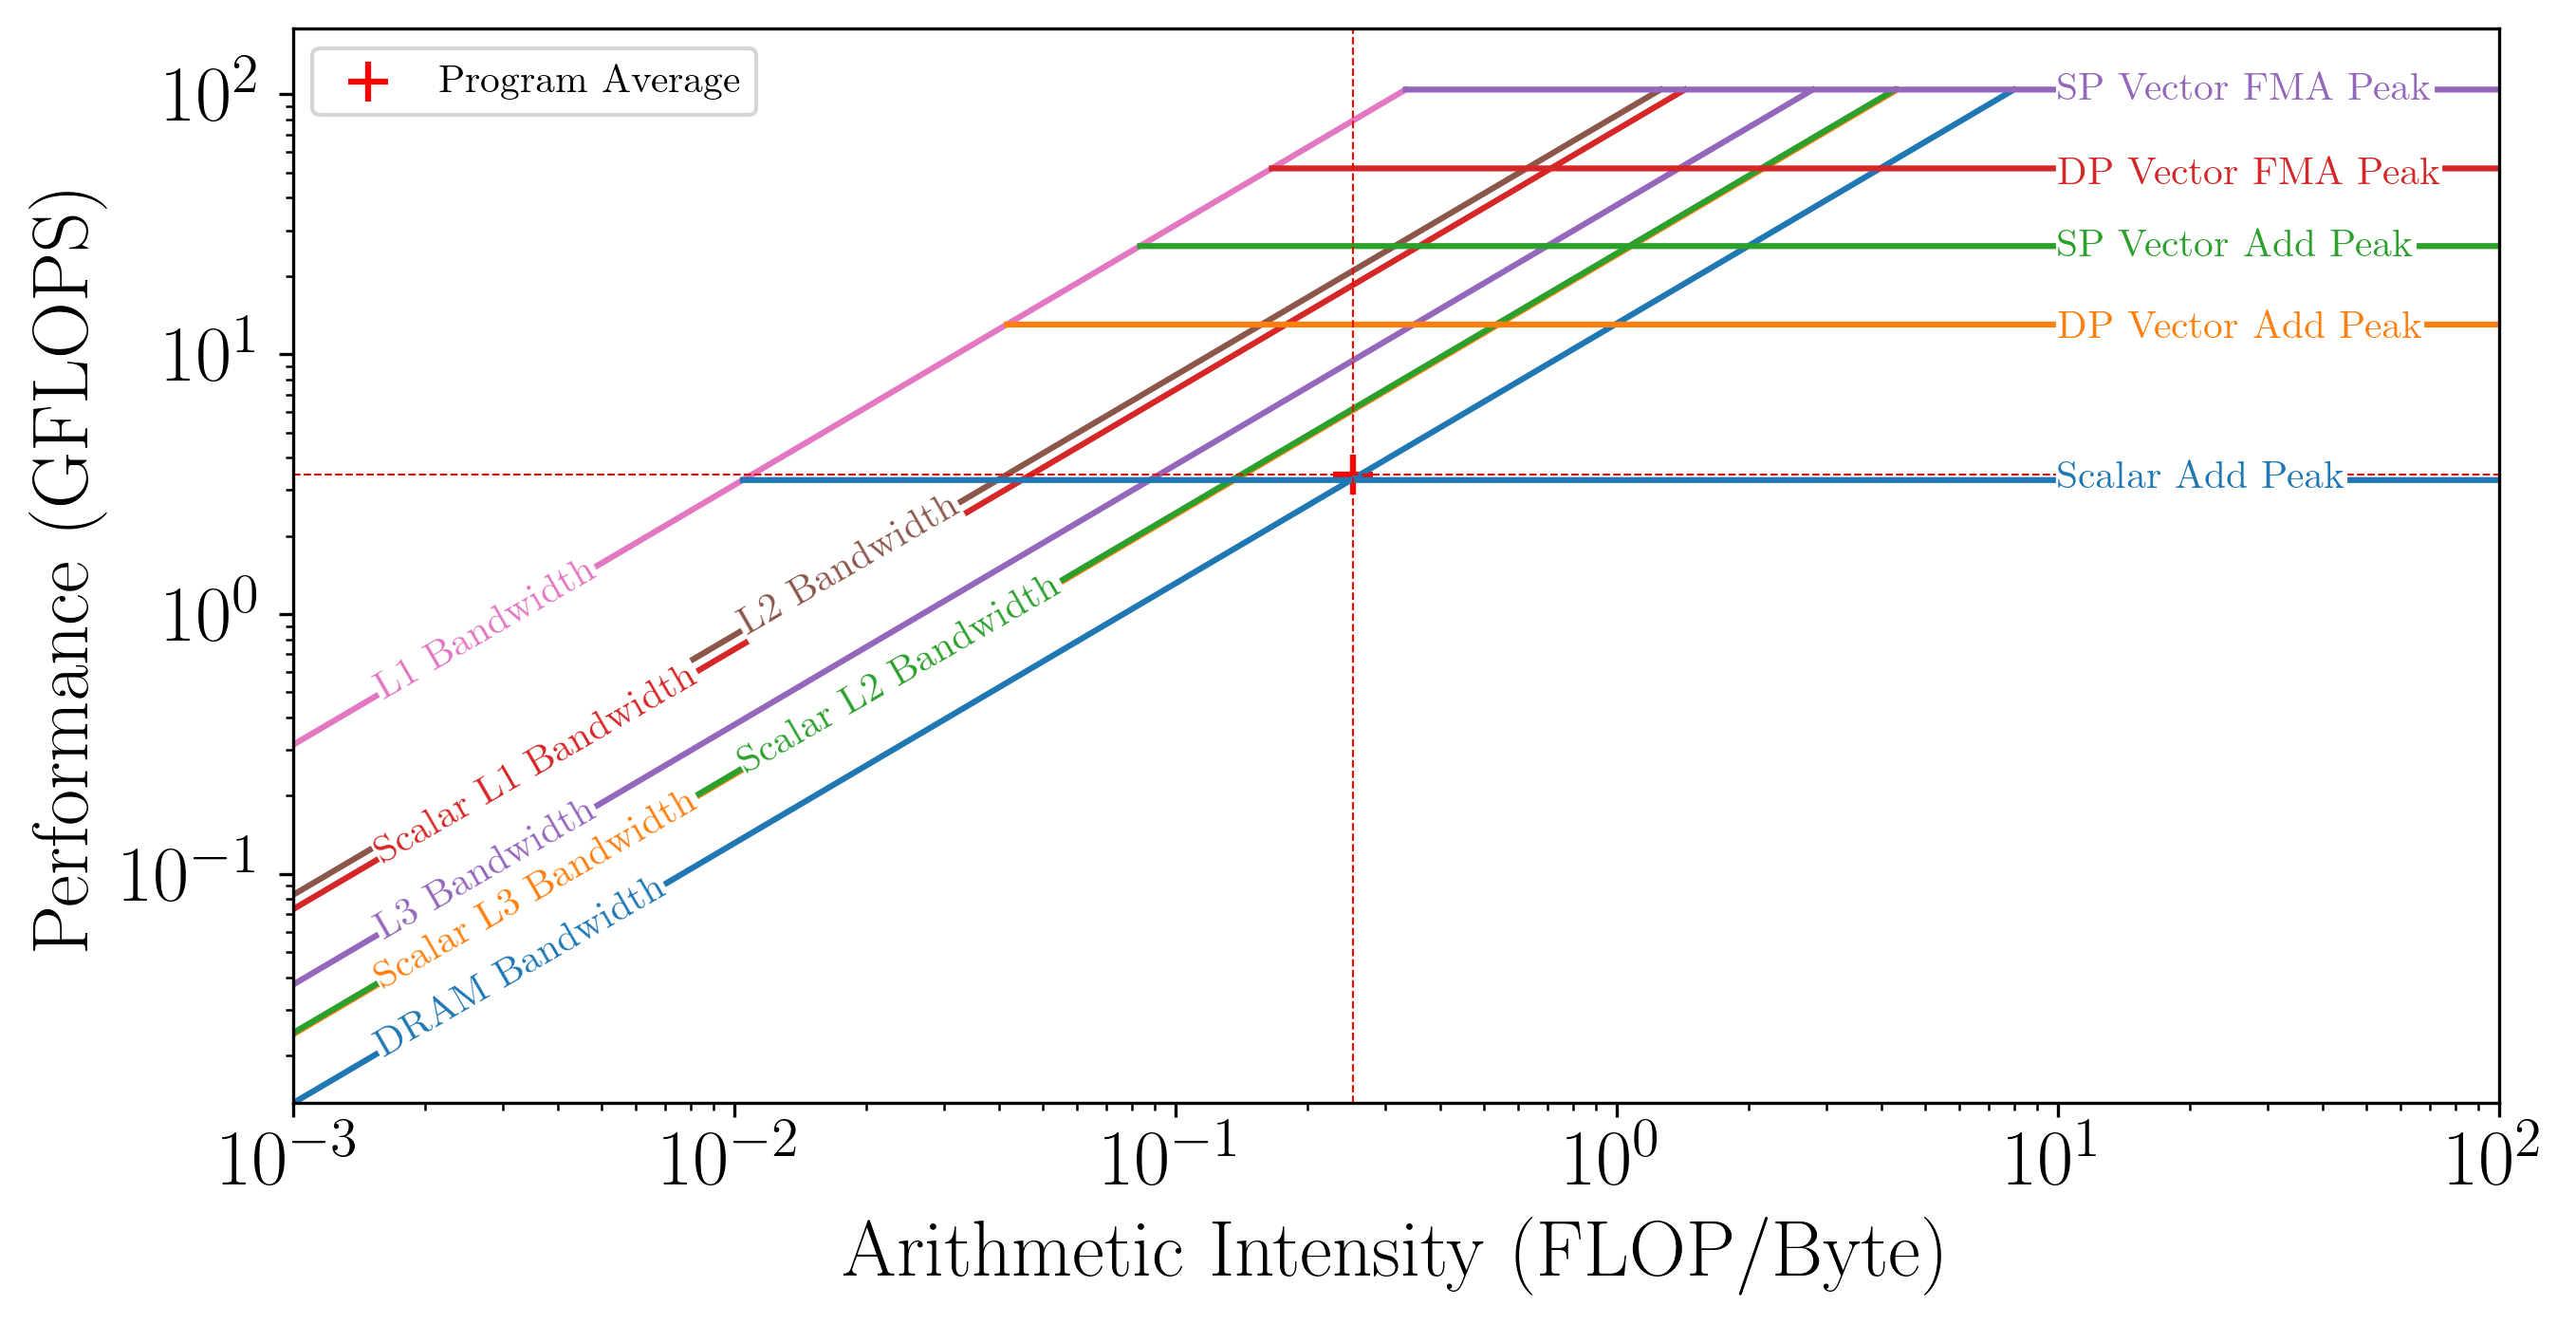

In [2]:
def draw_roofline(
    dram, l3_scalar, l2_scalar, l1_scalar, l3, l2, l1,
    scalar_add_peak, dp_vector_add_peak, sp_vector_add_peak, dp_vector_fma_peak, sp_vector_fma_peak,
    point):
    xs = np.logspace(-3, 2, 10000)
    
    plt.figure(figsize=(10,5))
    
    XMIN = xs[0]
    XMAX = xs[-1]
    YMIN = xs[0] * dram
    YMAX = sp_vector_fma_peak + 75
    
    # Plotting memory bounds
    dram_values = xs * dram
    l3_scalar_values = xs * l3_scalar
    l2_scalar_values = xs * l2_scalar
    l1_scalar_values = xs * l1_scalar
    l3_values = xs * l3
    l2_values = xs * l2
    l1_values = xs * l1
    
    dram_xs = xs[dram_values < sp_vector_fma_peak]
    l3_scalar_xs = xs[l3_scalar_values < sp_vector_fma_peak]
    l2_scalar_xs = xs[l2_scalar_values < sp_vector_fma_peak]
    l1_scalar_xs = xs[l1_scalar_values < sp_vector_fma_peak]
    l3_xs = xs[l3_values < sp_vector_fma_peak]
    l2_xs = xs[l2_values < sp_vector_fma_peak]
    l1_xs = xs[l1_values < sp_vector_fma_peak]
    
    dram_values = dram_values[dram_values < sp_vector_fma_peak]
    l3_scalar_values = l3_scalar_values[l3_scalar_values < sp_vector_fma_peak]
    l2_scalar_values = l2_scalar_values[l2_scalar_values < sp_vector_fma_peak]
    l1_scalar_values = l1_scalar_values[l1_scalar_values < sp_vector_fma_peak]
    l3_values = l3_values[l3_values < sp_vector_fma_peak]
    l2_values = l2_values[l2_values < sp_vector_fma_peak]
    l1_values = l1_values[l1_values < sp_vector_fma_peak]
    
    plt.plot(dram_xs, dram_values, c = "#1f77b4")
    plt.plot(l3_scalar_xs, l3_scalar_values, c = "#ff7f0e")
    plt.plot(l2_scalar_xs, l2_scalar_values, c = "#2ca02c")
    plt.plot(l1_scalar_xs, l1_scalar_values, c = "#d62728")
    plt.plot(l3_xs, l3_values, c = "#9467bd")
    plt.plot(l2_xs, l2_values, c = "#8c564b")
    plt.plot(l1_xs, l1_values, c = "#e377c2")
    
    plt.annotate("DRAM Bandwidth",      (0.0015, dram *      0.0015), fontsize = 10, bbox=dict(facecolor='white', edgecolor='white', pad = 0), rotation = 30, c = "#1f77b4")
    plt.annotate("Scalar L2 Bandwidth", (0.01,   l2_scalar * 0.01),   fontsize = 10, bbox=dict(facecolor='white', edgecolor='white', pad = 0), rotation = 30, c = "#2ca02c")
    plt.annotate("Scalar L1 Bandwidth", (0.0015, l1_scalar * 0.0015), fontsize = 10, bbox=dict(facecolor='white', edgecolor='white', pad = 0), rotation = 30, c = "#d62728")
    plt.annotate("Scalar L3 Bandwidth", (0.0015, l3_scalar * 0.0015), fontsize = 10, bbox=dict(facecolor='white', edgecolor='white', pad = 0), rotation = 30, c = "#ff7f0e")
    plt.annotate("L3 Bandwidth",        (0.0015, l3 *        0.0015), fontsize = 10, bbox=dict(facecolor='white', edgecolor='white', pad = 0), rotation = 30, c = "#9467bd")
    plt.annotate("L2 Bandwidth",        (0.01,   l2 *        0.01),   fontsize = 10, bbox=dict(facecolor='white', edgecolor='white', pad = 0), rotation = 30, c = "#8c564b")
    plt.annotate("L1 Bandwidth",        (0.0015, l1 *        0.0015), fontsize = 10, bbox=dict(facecolor='white', edgecolor='white', pad = 0), rotation = 30, c = "#e377c2")
    
    # Plotting compute bounds
    
    scalar_add_xs = xs[xs * l1 > scalar_add_peak]
    dp_vector_add_xs = xs[xs * l1 > dp_vector_add_peak]
    sp_vector_add_xs = xs[xs * l1 > sp_vector_add_peak]
    dp_vector_fma_xs = xs[xs * l1 > dp_vector_fma_peak]
    sp_vector_fma_xs = xs[xs * l1 > sp_vector_fma_peak]
    
    plt.plot(scalar_add_xs, np.full(len(scalar_add_xs), scalar_add_peak), c = "#1f77b4")
    plt.plot(dp_vector_add_xs, np.full(len(dp_vector_add_xs), dp_vector_add_peak), c = "#ff7f0e")
    plt.plot(sp_vector_add_xs, np.full(len(sp_vector_add_xs), sp_vector_add_peak), c = "#2ca02c")
    plt.plot(dp_vector_fma_xs, np.full(len(dp_vector_fma_xs), dp_vector_fma_peak), c = "#d62728")
    plt.plot(sp_vector_fma_xs, np.full(len(sp_vector_fma_xs), sp_vector_fma_peak), c = "#9467bd")
    
    plt.annotate("Scalar Add Peak",    (10, scalar_add_peak - 0.25),   fontsize = 10, bbox = dict(facecolor='white', edgecolor='white', pad = 0), c = "#1f77b4")
    plt.annotate("DP Vector Add Peak", (10, dp_vector_add_peak - 1.5), fontsize = 10, bbox = dict(facecolor='white', edgecolor='white', pad = 0), c = "#ff7f0e")
    plt.annotate("SP Vector Add Peak", (10, sp_vector_add_peak - 2.5), fontsize = 10, bbox = dict(facecolor='white', edgecolor='white', pad = 0), c = "#2ca02c")
    plt.annotate("DP Vector FMA Peak", (10, dp_vector_fma_peak - 7),   fontsize = 10, bbox = dict(facecolor='white', edgecolor='white', pad = 0), c = "#d62728")
    plt.annotate("SP Vector FMA Peak", (10, sp_vector_fma_peak - 10),  fontsize = 10, bbox = dict(facecolor='white', edgecolor='white', pad = 0), c = "#9467bd")
    
    # Plotting point and axes
    
    plt.scatter(point[0], point[1], marker = "+", s = 100, c = 'red', label = "Program Average")
    plt.plot(np.full(1000, point[0]), np.linspace(YMIN, YMAX, 1000), c = 'red', linestyle = 'dashed', linewidth = 0.5)
    plt.plot(np.linspace(XMIN, XMAX, 1000), np.full(1000, point[1]), c = 'red', linestyle = 'dashed', linewidth = 0.5)
    
    plt.xlabel("Arithmetic Intensity (FLOP/Byte)", fontsize = 20)
    plt.ylabel("Performance (GFLOPS)", fontsize = 20)
    
    plt.xscale("log")
    plt.yscale("log")
    plt.xlim(XMIN, XMAX)
    plt.ylim(YMIN, YMAX)
    
    plt.legend()
    
    return plt
    
    
# COMPILER
x = draw_roofline(
    13.1, 24.08, 24.38, 72.98, 37.43, 82.87, 313.29,
    3.28, 13.01, 26.08, 51.9, 104.35,
    (0.253, 3.45)
)
x.show()

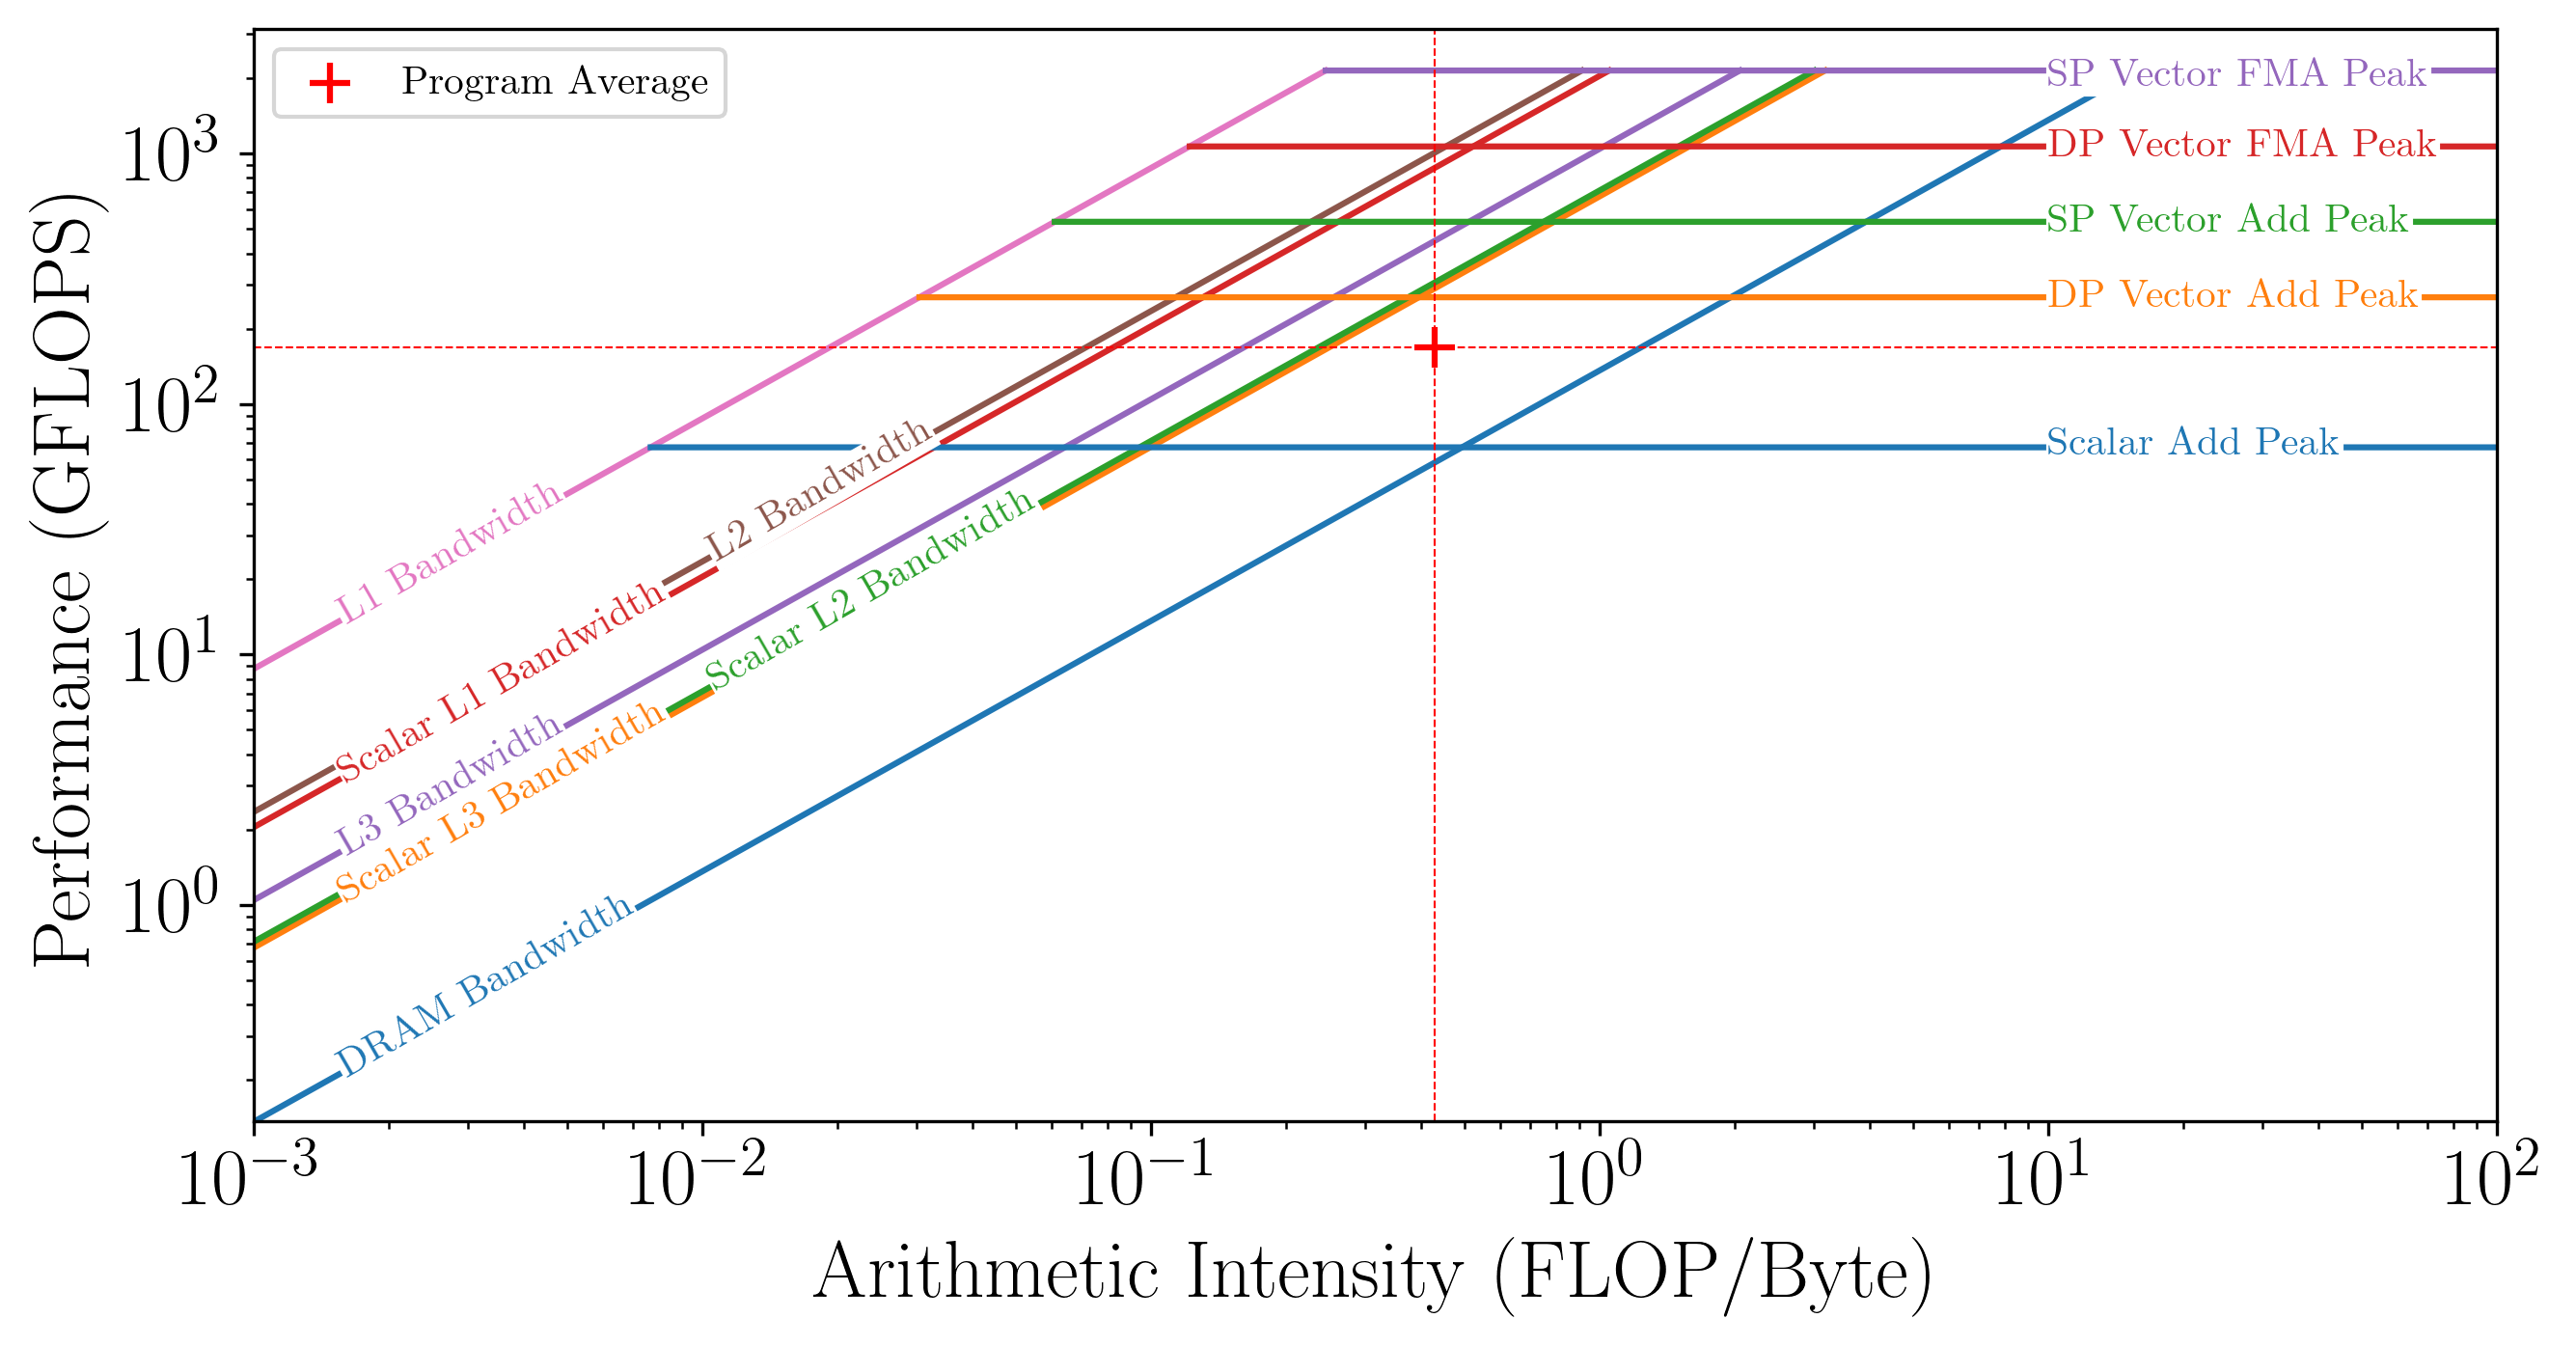

In [3]:
def draw_roofline(
    dram, l3_scalar, l2_scalar, l1_scalar, l3, l2, l1,
    scalar_add_peak, dp_vector_add_peak, sp_vector_add_peak, dp_vector_fma_peak, sp_vector_fma_peak,
    point):
    xs = np.logspace(-3, 2, 10000)
    
    plt.figure(figsize=(10,5))
    
    XMIN = xs[0]
    XMAX = xs[-1]
    YMIN = xs[0] * dram
    YMAX = sp_vector_fma_peak + 1000
    
    # Plotting memory bounds
    dram_values = xs * dram
    l3_scalar_values = xs * l3_scalar
    l2_scalar_values = xs * l2_scalar
    l1_scalar_values = xs * l1_scalar
    l3_values = xs * l3
    l2_values = xs * l2
    l1_values = xs * l1
    
    dram_xs = xs[dram_values < sp_vector_fma_peak]
    l3_scalar_xs = xs[l3_scalar_values < sp_vector_fma_peak]
    l2_scalar_xs = xs[l2_scalar_values < sp_vector_fma_peak]
    l1_scalar_xs = xs[l1_scalar_values < sp_vector_fma_peak]
    l3_xs = xs[l3_values < sp_vector_fma_peak]
    l2_xs = xs[l2_values < sp_vector_fma_peak]
    l1_xs = xs[l1_values < sp_vector_fma_peak]
    
    dram_values = dram_values[dram_values < sp_vector_fma_peak]
    l3_scalar_values = l3_scalar_values[l3_scalar_values < sp_vector_fma_peak]
    l2_scalar_values = l2_scalar_values[l2_scalar_values < sp_vector_fma_peak]
    l1_scalar_values = l1_scalar_values[l1_scalar_values < sp_vector_fma_peak]
    l3_values = l3_values[l3_values < sp_vector_fma_peak]
    l2_values = l2_values[l2_values < sp_vector_fma_peak]
    l1_values = l1_values[l1_values < sp_vector_fma_peak]
    
    plt.plot(dram_xs, dram_values, c = "#1f77b4")
    plt.plot(l3_scalar_xs, l3_scalar_values, c = "#ff7f0e")
    plt.plot(l2_scalar_xs, l2_scalar_values, c = "#2ca02c")
    plt.plot(l1_scalar_xs, l1_scalar_values, c = "#d62728")
    plt.plot(l3_xs, l3_values, c = "#9467bd")
    plt.plot(l2_xs, l2_values, c = "#8c564b")
    plt.plot(l1_xs, l1_values, c = "#e377c2")
    
    plt.annotate("DRAM Bandwidth",      (0.0015, dram *      0.0015), fontsize = 10, bbox=dict(facecolor='white', edgecolor='white', pad = 0), rotation = 30, c = "#1f77b4")
    plt.annotate("Scalar L2 Bandwidth", (0.01,   l2_scalar * 0.01),   fontsize = 10, bbox=dict(facecolor='white', edgecolor='white', pad = 0), rotation = 30, c = "#2ca02c")
    plt.annotate("Scalar L1 Bandwidth", (0.0015, l1_scalar * 0.0015), fontsize = 10, bbox=dict(facecolor='white', edgecolor='white', pad = 0), rotation = 30, c = "#d62728")
    plt.annotate("Scalar L3 Bandwidth", (0.0015, l3_scalar * 0.0015), fontsize = 10, bbox=dict(facecolor='white', edgecolor='white', pad = 0), rotation = 30, c = "#ff7f0e")
    plt.annotate("L3 Bandwidth",        (0.0015, l3 *        0.0015), fontsize = 10, bbox=dict(facecolor='white', edgecolor='white', pad = 0), rotation = 30, c = "#9467bd")
    plt.annotate("L2 Bandwidth",        (0.01,   l2 *        0.01),   fontsize = 10, bbox=dict(facecolor='white', edgecolor='white', pad = 0), rotation = 30, c = "#8c564b")
    plt.annotate("L1 Bandwidth",        (0.0015, l1 *        0.0015), fontsize = 10, bbox=dict(facecolor='white', edgecolor='white', pad = 0), rotation = 30, c = "#e377c2")
    
    # Plotting compute bounds
    
    scalar_add_xs = xs[xs * l1 > scalar_add_peak]
    dp_vector_add_xs = xs[xs * l1 > dp_vector_add_peak]
    sp_vector_add_xs = xs[xs * l1 > sp_vector_add_peak]
    dp_vector_fma_xs = xs[xs * l1 > dp_vector_fma_peak]
    sp_vector_fma_xs = xs[xs * l1 > sp_vector_fma_peak]
    
    plt.plot(scalar_add_xs, np.full(len(scalar_add_xs), scalar_add_peak), c = "#1f77b4")
    plt.plot(dp_vector_add_xs, np.full(len(dp_vector_add_xs), dp_vector_add_peak), c = "#ff7f0e")
    plt.plot(sp_vector_add_xs, np.full(len(sp_vector_add_xs), sp_vector_add_peak), c = "#2ca02c")
    plt.plot(dp_vector_fma_xs, np.full(len(dp_vector_fma_xs), dp_vector_fma_peak), c = "#d62728")
    plt.plot(sp_vector_fma_xs, np.full(len(sp_vector_fma_xs), sp_vector_fma_peak), c = "#9467bd")
    
    plt.annotate("Scalar Add Peak",    (10, scalar_add_peak - 5),   fontsize = 10, bbox = dict(facecolor='white', edgecolor='white', pad = 0), c = "#1f77b4")
    plt.annotate("DP Vector Add Peak", (10, dp_vector_add_peak - 25), fontsize = 10, bbox = dict(facecolor='white', edgecolor='white', pad = 0), c = "#ff7f0e")
    plt.annotate("SP Vector Add Peak", (10, sp_vector_add_peak - 50), fontsize = 10, bbox = dict(facecolor='white', edgecolor='white', pad = 0), c = "#2ca02c")
    plt.annotate("DP Vector FMA Peak", (10, dp_vector_fma_peak - 100),   fontsize = 10, bbox = dict(facecolor='white', edgecolor='white', pad = 0), c = "#d62728")
    plt.annotate("SP Vector FMA Peak", (10, sp_vector_fma_peak - 300),  fontsize = 10, bbox = dict(facecolor='white', edgecolor='white', pad = 0), c = "#9467bd")
    
    # Plotting point and axes
    
    plt.scatter(point[0], point[1], marker = "+", s = 100, c = 'red', label = "Program Average")
    plt.plot(np.full(1000, point[0]), np.linspace(YMIN, YMAX, 1000), c = 'red', linestyle = 'dashed', linewidth = 0.5)
    plt.plot(np.linspace(XMIN, XMAX, 1000), np.full(1000, point[1]), c = 'red', linestyle = 'dashed', linewidth = 0.5)
    
    plt.xlabel("Arithmetic Intensity (FLOP/Byte)", fontsize = 20)
    plt.ylabel("Performance (GFLOPS)", fontsize = 20)
    
    plt.xscale("log")
    plt.yscale("log")
    plt.xlim(XMIN, XMAX)
    plt.ylim(YMIN, YMAX)
    
    plt.legend()
    
    return plt
    
    
# NUMA
x = draw_roofline(
    136.42, 675.99, 713.97, 2047.48, 1046.94, 2355.48, 8777.08,
    67.2, 266.92, 534.43, 1068.32, 2146.84,
    (0.428, 168.91)
)
x.show()

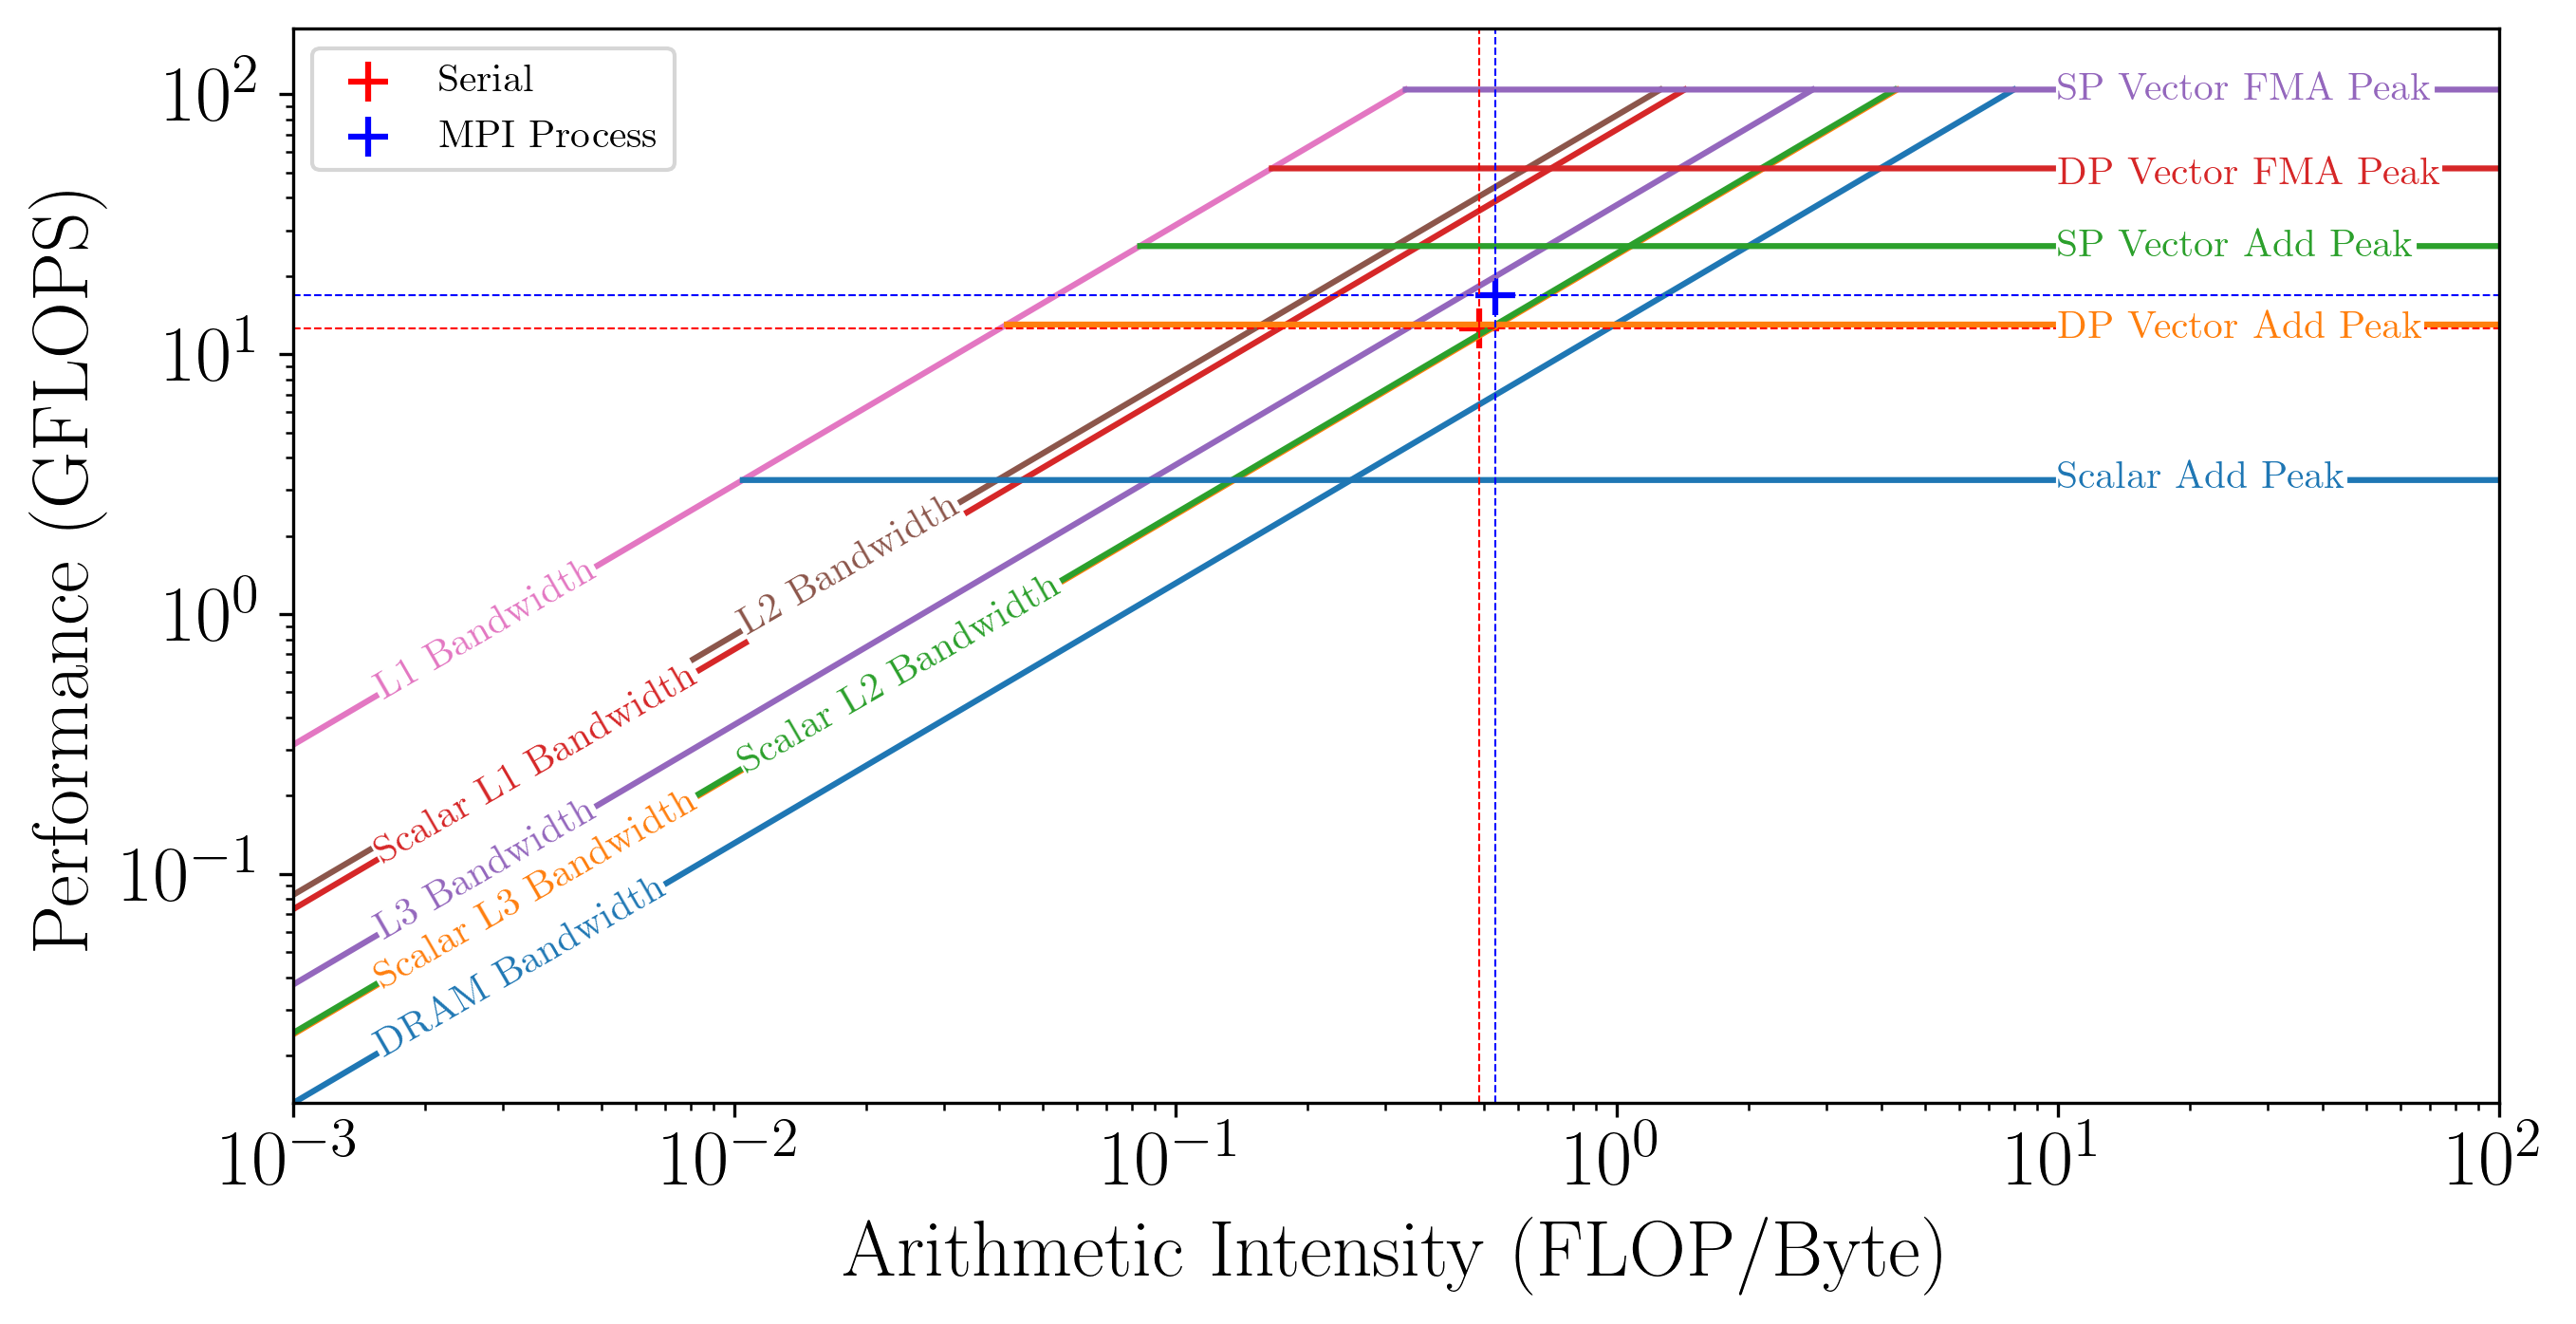

In [15]:
def draw_roofline(
    dram, l3_scalar, l2_scalar, l1_scalar, l3, l2, l1,
    scalar_add_peak, dp_vector_add_peak, sp_vector_add_peak, dp_vector_fma_peak, sp_vector_fma_peak,
    point_vectorized, point_mpi):
    xs = np.logspace(-3, 2, 10000)
    
    plt.figure(figsize=(10,5))
    
    XMIN = xs[0]
    XMAX = xs[-1]
    YMIN = xs[0] * dram
    YMAX = sp_vector_fma_peak + 75
    
    # Plotting memory bounds
    dram_values = xs * dram
    l3_scalar_values = xs * l3_scalar
    l2_scalar_values = xs * l2_scalar
    l1_scalar_values = xs * l1_scalar
    l3_values = xs * l3
    l2_values = xs * l2
    l1_values = xs * l1
    
    dram_xs = xs[dram_values < sp_vector_fma_peak]
    l3_scalar_xs = xs[l3_scalar_values < sp_vector_fma_peak]
    l2_scalar_xs = xs[l2_scalar_values < sp_vector_fma_peak]
    l1_scalar_xs = xs[l1_scalar_values < sp_vector_fma_peak]
    l3_xs = xs[l3_values < sp_vector_fma_peak]
    l2_xs = xs[l2_values < sp_vector_fma_peak]
    l1_xs = xs[l1_values < sp_vector_fma_peak]
    
    dram_values = dram_values[dram_values < sp_vector_fma_peak]
    l3_scalar_values = l3_scalar_values[l3_scalar_values < sp_vector_fma_peak]
    l2_scalar_values = l2_scalar_values[l2_scalar_values < sp_vector_fma_peak]
    l1_scalar_values = l1_scalar_values[l1_scalar_values < sp_vector_fma_peak]
    l3_values = l3_values[l3_values < sp_vector_fma_peak]
    l2_values = l2_values[l2_values < sp_vector_fma_peak]
    l1_values = l1_values[l1_values < sp_vector_fma_peak]
    
    plt.plot(dram_xs, dram_values, c = "#1f77b4")
    plt.plot(l3_scalar_xs, l3_scalar_values, c = "#ff7f0e")
    plt.plot(l2_scalar_xs, l2_scalar_values, c = "#2ca02c")
    plt.plot(l1_scalar_xs, l1_scalar_values, c = "#d62728")
    plt.plot(l3_xs, l3_values, c = "#9467bd")
    plt.plot(l2_xs, l2_values, c = "#8c564b")
    plt.plot(l1_xs, l1_values, c = "#e377c2")
    
    plt.annotate("DRAM Bandwidth",      (0.0015, dram *      0.0015), fontsize = 10, bbox=dict(facecolor='white', edgecolor='white', pad = 0), rotation = 30, c = "#1f77b4")
    plt.annotate("Scalar L2 Bandwidth", (0.01,   l2_scalar * 0.01),   fontsize = 10, bbox=dict(facecolor='white', edgecolor='white', pad = 0), rotation = 30, c = "#2ca02c")
    plt.annotate("Scalar L1 Bandwidth", (0.0015, l1_scalar * 0.0015), fontsize = 10, bbox=dict(facecolor='white', edgecolor='white', pad = 0), rotation = 30, c = "#d62728")
    plt.annotate("Scalar L3 Bandwidth", (0.0015, l3_scalar * 0.0015), fontsize = 10, bbox=dict(facecolor='white', edgecolor='white', pad = 0), rotation = 30, c = "#ff7f0e")
    plt.annotate("L3 Bandwidth",        (0.0015, l3 *        0.0015), fontsize = 10, bbox=dict(facecolor='white', edgecolor='white', pad = 0), rotation = 30, c = "#9467bd")
    plt.annotate("L2 Bandwidth",        (0.01,   l2 *        0.01),   fontsize = 10, bbox=dict(facecolor='white', edgecolor='white', pad = 0), rotation = 30, c = "#8c564b")
    plt.annotate("L1 Bandwidth",        (0.0015, l1 *        0.0015), fontsize = 10, bbox=dict(facecolor='white', edgecolor='white', pad = 0), rotation = 30, c = "#e377c2")
    
    # Plotting compute bounds
    
    scalar_add_xs = xs[xs * l1 > scalar_add_peak]
    dp_vector_add_xs = xs[xs * l1 > dp_vector_add_peak]
    sp_vector_add_xs = xs[xs * l1 > sp_vector_add_peak]
    dp_vector_fma_xs = xs[xs * l1 > dp_vector_fma_peak]
    sp_vector_fma_xs = xs[xs * l1 > sp_vector_fma_peak]
    
    plt.plot(scalar_add_xs, np.full(len(scalar_add_xs), scalar_add_peak), c = "#1f77b4")
    plt.plot(dp_vector_add_xs, np.full(len(dp_vector_add_xs), dp_vector_add_peak), c = "#ff7f0e")
    plt.plot(sp_vector_add_xs, np.full(len(sp_vector_add_xs), sp_vector_add_peak), c = "#2ca02c")
    plt.plot(dp_vector_fma_xs, np.full(len(dp_vector_fma_xs), dp_vector_fma_peak), c = "#d62728")
    plt.plot(sp_vector_fma_xs, np.full(len(sp_vector_fma_xs), sp_vector_fma_peak), c = "#9467bd")
    
    plt.annotate("Scalar Add Peak",    (10, scalar_add_peak - 0.25),   fontsize = 10, bbox = dict(facecolor='white', edgecolor='white', pad = 0), c = "#1f77b4")
    plt.annotate("DP Vector Add Peak", (10, dp_vector_add_peak - 1.5), fontsize = 10, bbox = dict(facecolor='white', edgecolor='white', pad = 0), c = "#ff7f0e")
    plt.annotate("SP Vector Add Peak", (10, sp_vector_add_peak - 2.5), fontsize = 10, bbox = dict(facecolor='white', edgecolor='white', pad = 0), c = "#2ca02c")
    plt.annotate("DP Vector FMA Peak", (10, dp_vector_fma_peak - 7),   fontsize = 10, bbox = dict(facecolor='white', edgecolor='white', pad = 0), c = "#d62728")
    plt.annotate("SP Vector FMA Peak", (10, sp_vector_fma_peak - 10),  fontsize = 10, bbox = dict(facecolor='white', edgecolor='white', pad = 0), c = "#9467bd")
    
    # Plotting point and axes
    
    plt.scatter(point_vectorized[0], point_vectorized[1], marker = "+", s = 100, c = 'red', label = "Serial")
    plt.plot(np.full(1000, point_vectorized[0]), np.linspace(YMIN, YMAX, 1000), c = 'red', linestyle = 'dashed', linewidth = 0.5)
    plt.plot(np.linspace(XMIN, XMAX, 1000), np.full(1000, point_vectorized[1]), c = 'red', linestyle = 'dashed', linewidth = 0.5)
    
    plt.scatter(point_mpi[0], point_mpi[1], marker = "+", s = 100, c = 'blue', label = "MPI Process")
    plt.plot(np.full(1000, point_mpi[0]), np.linspace(YMIN, YMAX, 1000), c = 'blue', linestyle = 'dashed', linewidth = 0.5)
    plt.plot(np.linspace(XMIN, XMAX, 1000), np.full(1000, point_mpi[1]), c = 'blue', linestyle = 'dashed', linewidth = 0.5)
    
    plt.xlabel("Arithmetic Intensity (FLOP/Byte)", fontsize = 20)
    plt.ylabel("Performance (GFLOPS)", fontsize = 20)
    
    plt.xscale("log")
    plt.yscale("log")
    plt.xlim(XMIN, XMAX)
    plt.ylim(YMIN, YMAX)
    
    plt.legend()
    
    return plt
    
    
# COMPILER
x = draw_roofline(
    13.1, 24.08, 24.38, 72.98, 37.43, 82.87, 313.29,
    3.28, 13.01, 26.08, 51.9, 104.35,
    (0.489, 12.567),
    (0.533, 16.905)
)
x.show()